# Lasso and Ridge Regression

This document outlines the mathematical foundations and key concepts of **Lasso** and **Ridge regression**, two essential regularized linear regression techniques used in machine learning for improved model performance and interpretability.

---

## 📌 Lasso Regression (L1 Regularization)

### 🎯 Objective Function

$$
\min_{\beta} \left( \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p |\beta_j| \right)
$$

### 🔍 Components

- \( y_i \): Actual response value for the \( i \)-th observation.
- \( \hat{y}_i \): Predicted response value, computed as
  \( \hat{y}_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip} \).
- \( \beta_j \): Regression coefficient for the \( j \)-th feature.
- \( \lambda \): Regularization parameter controlling the strength of the L1 penalty.
- \( \sum_{j=1}^p |\beta_j| \): L1 penalty term promoting sparsity.

### 🧠 Description

Lasso (Least Absolute Shrinkage and Selection Operator) regression extends ordinary least squares by adding an **L1 penalty**. This penalty encourages **sparsity**, meaning it can set less important feature coefficients to **zero**, effectively performing **feature selection**.

> Lasso is particularly useful in high-dimensional datasets where selecting a subset of relevant features is crucial.

---

## 📌 Ridge Regression (L2 Regularization)

### 🎯 Objective Function

$$
\min_{\beta} \left( \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \beta_j^2 \right)
$$

### 🔍 Components

- \( y_i \), \( \hat{y}_i \), \( \beta_j \), and \( \lambda \): Same as in Lasso regression.
- \( \sum_{j=1}^p \beta_j^2 \): L2 penalty term, penalizing squared magnitudes of coefficients.

### 🧠 Description

Ridge regression adds an **L2 penalty** to the ordinary least squares objective. This approach shrinks coefficient values to reduce model variance, making it effective for handling **multicollinearity** (highly correlated features).

> Unlike Lasso, Ridge does **not** zero out coefficients, but it produces smoother and more stable estimates.

---

## 🔍 Key Differences

| Feature            | Lasso Regression              | Ridge Regression             |
|--------------------|-------------------------------|------------------------------|
| **Sparsity**       | Can set \( \beta_j = 0 \)     | Shrinks \( \beta_j \), but not to 0 |
| **Penalty Type**   | L1 Norm \( |\beta_j| \)       | L2 Norm \( \beta_j^2 \)      |
| **Use Case**       | Feature selection in high dimensions | Handle multicollinearity     |

---

## ✅ When to Use

- **Use Lasso** when:
  - You want a sparse model (feature selection).
  - You have many irrelevant features.

- **Use Ridge** when:
  - You want all features to contribute.
  - You have multicollinearity issues.

---


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge
from sklearn.datasets import make_regression
from sklearn.metrics  import mean_squared_error


In [38]:
X,y=make_regression(n_samples=100,n_features=10,n_informative=5,noise=15,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# standardizing the features

X_train_mean=np.mean(X_train,axis=0)
X_train_std=np.std(X_train,axis=0)

X_train=(X_train-X_train_mean)/X_train_std
X_test=(X_test-x_train_mean)/X_train_std

X_test

array([[-1.52269470e+00, -9.55354964e-01,  1.45907001e+00,
         2.18977746e+00, -4.64316349e-01,  1.06117238e+00,
         7.60148545e-01,  8.88017579e-01, -1.58525405e+00,
         5.57982352e-01],
       [-7.85487336e-01, -2.41849352e+00,  2.77902596e-01,
        -8.14823508e-02, -1.21592231e+00, -1.19260464e+00,
         1.89809663e-01,  1.80980291e+00,  6.70864774e-01,
        -1.47769532e+00],
       [-4.20164695e-01,  2.35395673e-01,  6.88382658e-01,
        -1.67852840e+00, -2.24330000e-01,  1.42175602e+00,
         1.10065121e+00, -2.28824233e+00,  1.46315812e+00,
         3.58513757e+00],
       [ 2.66012073e-01, -1.12150630e+00, -4.68079943e-01,
         6.05833161e-01,  2.83050102e-01,  2.39631768e+00,
        -8.49587642e-01, -4.27111516e-01,  5.36573800e-02,
         1.00201190e+00],
       [-1.10736436e+00,  1.57031482e+00,  5.92494159e-02,
        -1.49125494e-01,  8.73799665e-01,  3.15749100e-01,
         2.68065136e+00, -8.22219852e-01,  1.45008027e-01,
        -2.

In [50]:
ridge_lib=Ridge(alpha=0.05)
ridge_lib.fit(X_train,y_train)
ridge_lib_pred=ridge_lib.predict(X_test)
print(f"Ridge MSE: {mean_squared_error(y_test,ridge_lib_pred)}")
print(" Ridge Coefficients:", np.round(ridge_lib.coef_, 2))

lasso_lib = Lasso(alpha=0.05)
lasso_lib.fit(X_train, y_train)
lasso_lib_preds = lasso_lib.predict(X_test)
print(f" Lasso MSE: {mean_squared_error(y_test, lasso_lib_preds):.2f}")
print(" Lasso Coefficients:", np.round(lasso_lib.coef_, 2))





Ridge MSE: 285.0794144264488
 Ridge Coefficients: [15.21  0.4   0.98 58.49  2.91 64.88 -1.45  9.1   3.78 -1.12]
 Lasso MSE: 285.65
 Lasso Coefficients: [15.17  0.35  0.92 58.46  2.85 64.85 -1.38  9.06  3.71 -1.05]


In [69]:
# from the scratch

class RidgeRegression:
    def __init__(self,alpha=1.0,learning_rate=0.01,n_iterations=1000):
        self.alpha=alpha
        self.learning_rate=learning_rate
        self.n_iterations=n_iterations
        self.weights=None
        self.bias=None

    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0

        for _ in range(self.n_iterations):
            y_pred=np.dot(X,self.weights)+self.bias

#            calculating the gradient
            dw=(1/n_samples)*(np.dot(X.T,(y_pred-y))+2*self.alpha*self.weights)
            db=(1/n_samples)*np.sum(y_pred-y)

            self.weights-=self.learning_rate*dw
            self.bias-=self.learning_rate*db

    def predict(self,X):
        return np.dot(X,self.weights)+self.bias


In [120]:
class LassoRegression:
    def __init__(self,alpha=1.0,learning_rate=0.01,n_iterations=1000):
        self.alpha=alpha
        self.learning_rate=learning_rate
        self.n_iterations=n_iterations
        self.weights=None
        self.bias=None

    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0

        for _ in range(self.n_iterations):
            y_pred =np.dot(X,self.weights)+self.bias

            rss_grad=np.dot(X.T,(y_pred-y))
            # this is an l1 penalty gradient
            l1_grad=self.alpha*np.sign(self.weights)

            dw=(1/n_samples)*(rss_grad+l1_grad)
            db=(1/n_samples)+np.sum(y_pred-y)

            self.weights-=self.learning_rate*dw
            self.bias-=self.learning_rate*db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [118]:
ridge_scratch = RidgeRegression(alpha=1.0)
ridge_scratch.fit(X_train, y_train)
print("Scratch Ridge Coefficients:", np.round(ridge_scratch.weights, 2))

lasso_scratch = LassoRegression(alpha=1.0)
lasso_scratch.fit(X_train, y_train)
print("Scratch Lasso Coefficients:", np.round(lasso_scratch.weights, 2))

Scratch Ridge Coefficients: [14.88 -0.17  1.32 56.84  2.74 63.08 -0.67  9.22  3.71 -0.77]
Scratch Lasso Coefficients: [15.19  0.27  1.07 58.42  2.95 64.81 -1.28  9.24  3.75 -1.02]


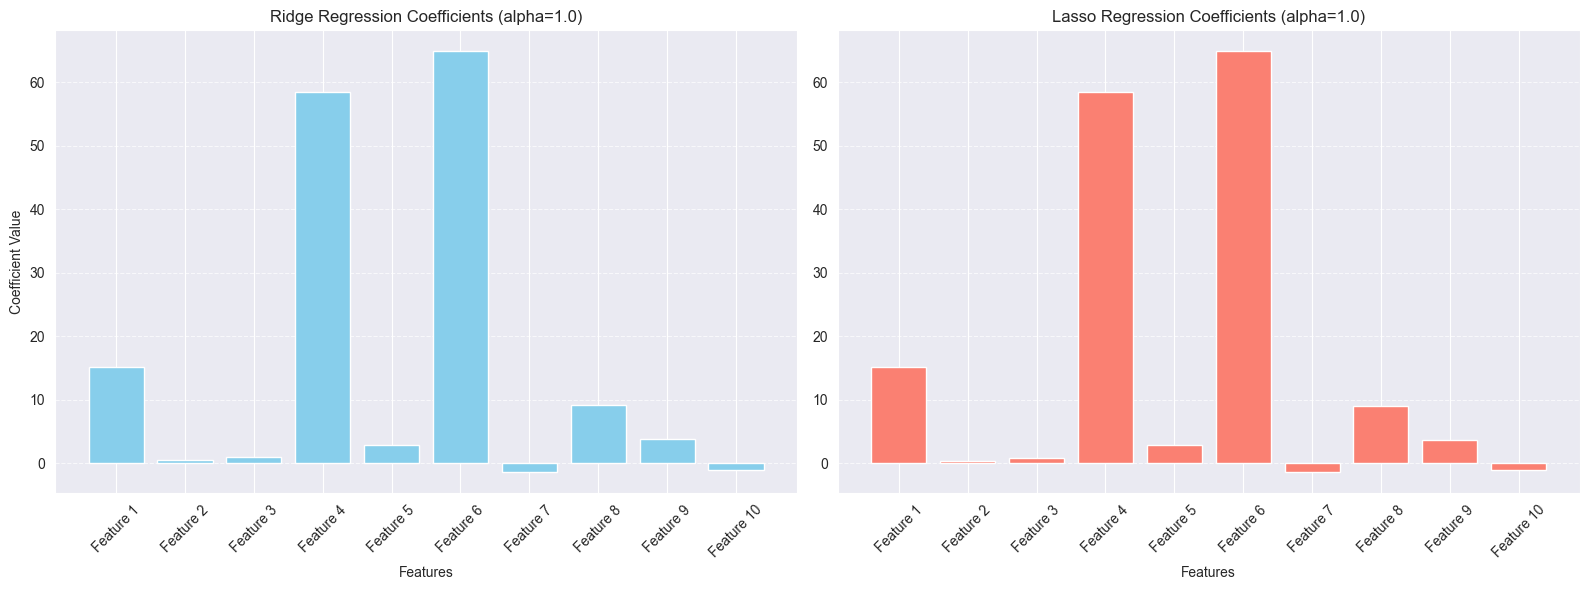

In [75]:
# Create a plot to compare coefficients
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

# Ridge Coefficients Plot
ax1.bar(feature_names, ridge_lib.coef_, color='skyblue', label='Scikit-learn Ridge')
ax1.set_title('Ridge Regression Coefficients (alpha=1.0)')
ax1.set_xlabel('Features')
ax1.set_ylabel('Coefficient Value')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Lasso Coefficients Plot
ax2.bar(feature_names, lasso_lib.coef_, color='salmon', label='Scikit-learn Lasso')
ax2.set_title('Lasso Regression Coefficients (alpha=1.0)')
ax2.set_xlabel('Features')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

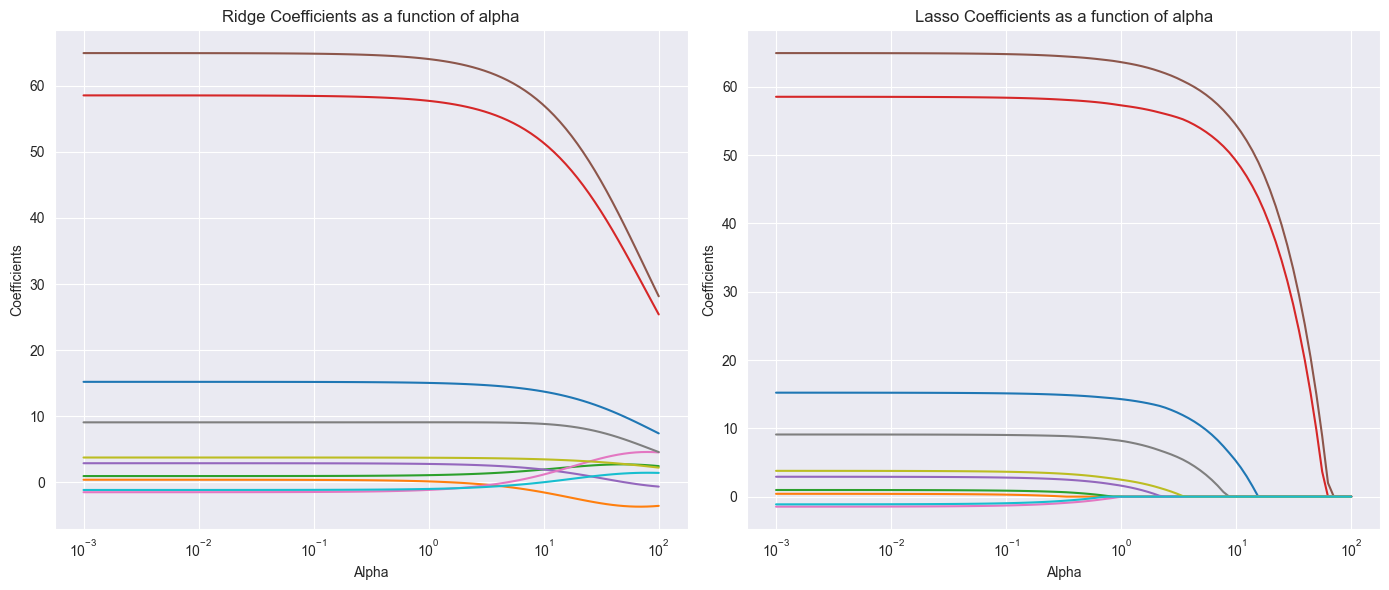